<a href="https://colab.research.google.com/github/sameerjha462000/DS/blob/main/11_and_13_april.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

So our problem is to predict the median_house_value of houses in california.<br>
This is our end to end project.<br>
For a machine learning project we do the following steps:<br>
1. Understanding the problem definition
2. Data collection
3. EDA(exploratory data analysis)
4. Data Preprocessing
5. Pipeline/Transformer
6. Feature Selection 
7. Model Selection
8. Model Evaluation(If model is not upto the mark, then repeat some steps again)
9. Model Deployment

# <font color = 'green'> 1.  Data collection </font>

In [2]:

df = pd.read_csv("https://raw.githubusercontent.com/purna135/ML-Datasets/main/California-Housing-Prices.csv")

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


So from the data it is obvious that we have one catgeorical column(__ocean_proximity__) and the rest are numerical column.

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# df.info gives the more info about the data, it's columns type, total records, null values ... etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


From this observe that it has null values in __total_bedrooms__.This shows that data is not clean. In later stage, we would need to manage the columns with null values.

In [6]:
# The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame.
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df["housing_median_age"].min()


1.0

In [8]:
df["housing_median_age"].max()


52.0

In [9]:
df["housing_median_age"].dtype


dtype('float64')

As we can see the dtype of housing_median_age is float64 but we can store the data in int8, by doing so it will reduce the data size.



In [10]:
df["housing_median_age"] = df["housing_median_age"].astype("int8")


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int8   
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(8), int8(1), object(1)
memory usage: 1.4+ MB


Now see that size of data has got reduced. Earlier it was 1.6MB+ and now it is 1.4MB+(hence we have reduced the data size by 0.2MB.)

In [12]:
# This gives the total number of null values in each column of the dataframe. We could also use df.isnull().sum()
df.isna().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# __3. Exploratory Data Analysis__

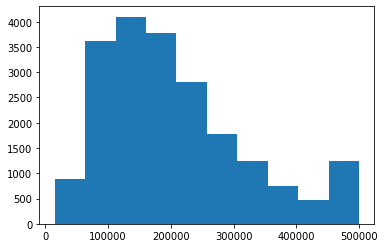

In [13]:
plt.hist(df["median_house_value"])
plt.show()

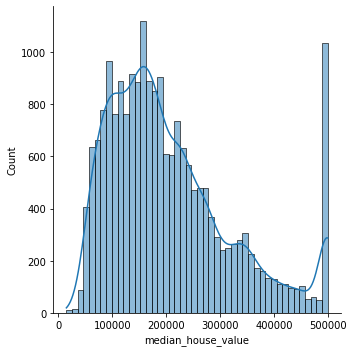

In [14]:
sns.displot(df["median_house_value"], kde=True)
plt.show()

In [15]:
df["ocean_proximity"].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

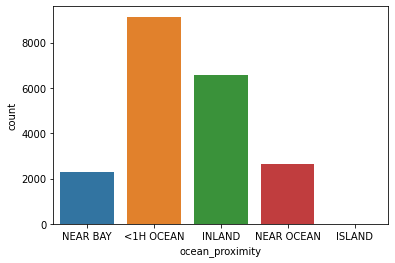

In [16]:
sns.countplot(data = df, x = "ocean_proximity")


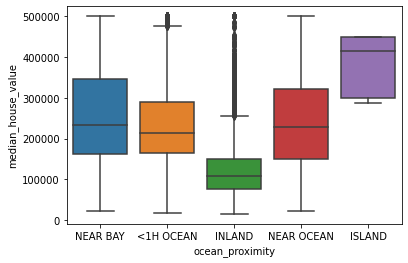

In [17]:
sns.boxplot(x="ocean_proximity", y="median_house_value", data=df)
plt.show()

# observe that at ISLAND the median of 'median_house_value' is quite high in comparison to other areas.
# So to buy house on an  island you would have to pay more(makes sense)

In [18]:
import plotly.express as px
px.box(df, x= "ocean_proximity", y = "median_house_value")


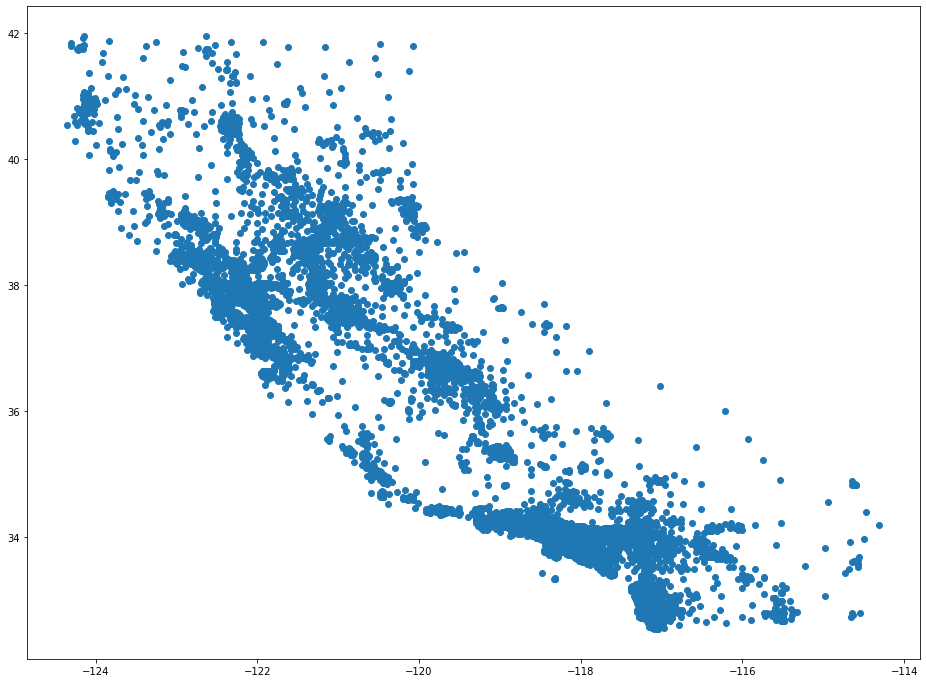

In [19]:
plt.figure(figsize = (16,12))
plt.scatter(df['longitude'], df["latitude"])
plt.show()

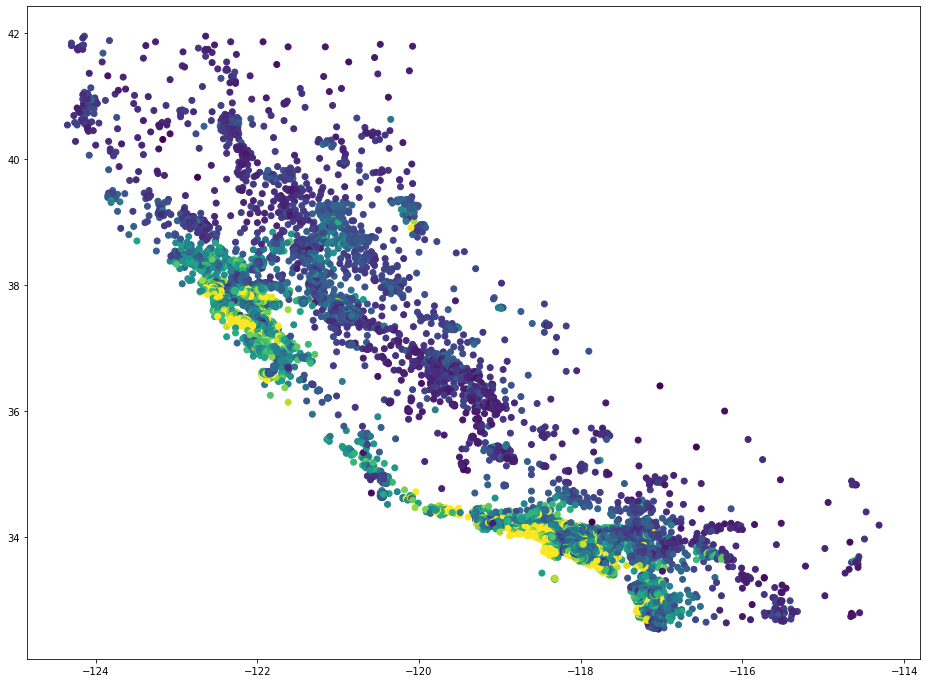

In [20]:
# we can also set the color of dots according to some column in the dataframe 
plt.figure(figsize = (16,12))
plt.scatter(df['longitude'], df["latitude"], c = df['median_house_value'])
plt.show()

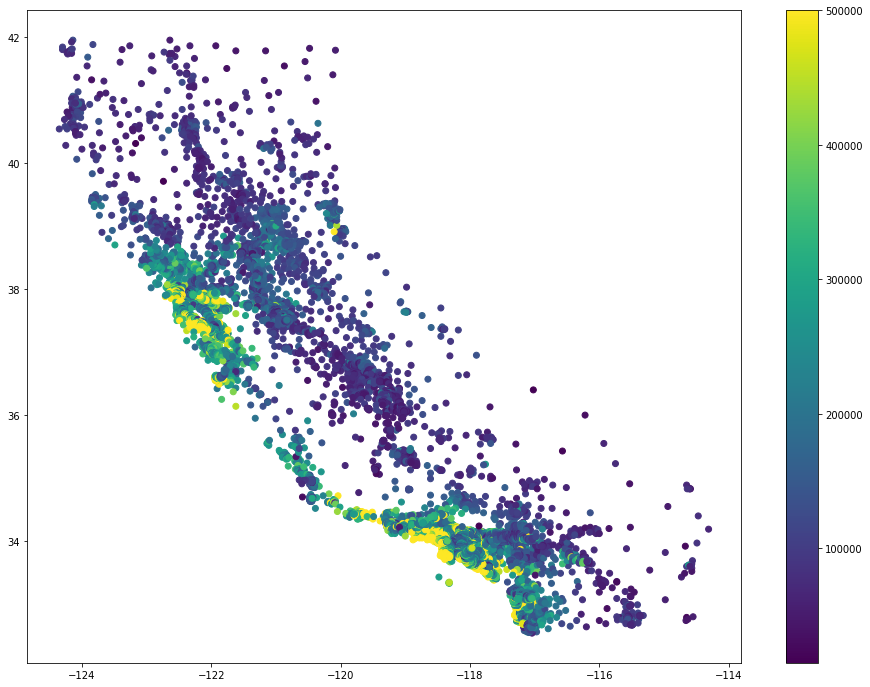

In [21]:
# we can also see the colorbar on the side by using the colorbar method of pyplot.
plt.figure(figsize = (16,12))
plt.scatter(df['longitude'], df["latitude"], c = df['median_house_value'])
plt.colorbar()
plt.show()

<font color ='purple'> The areas where we have yellow colored dots have high __median_house_value__.</font>

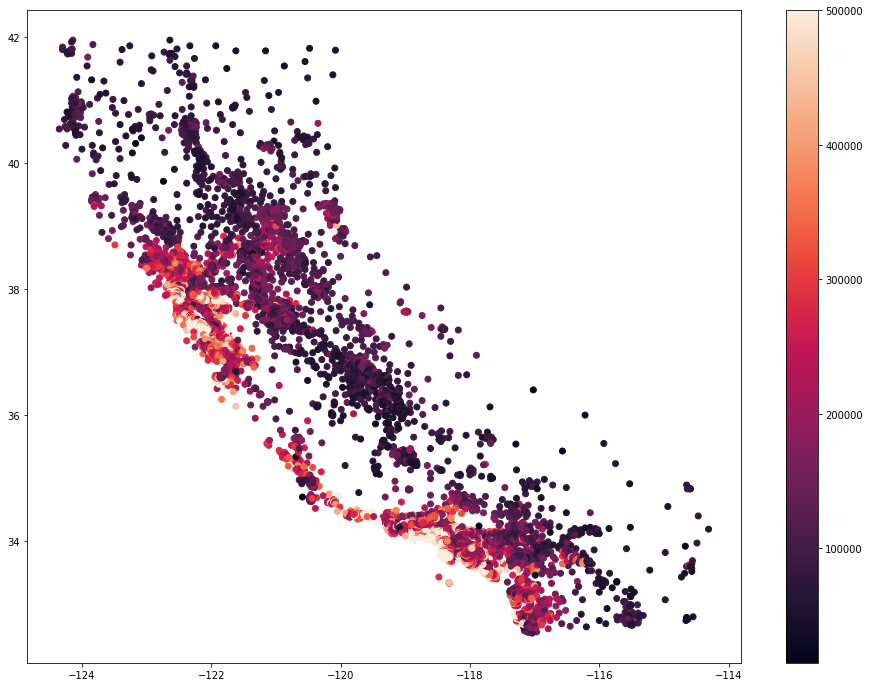

In [22]:
# We can also give color according to our choice by cmap parameter.
plt.figure(figsize = (16,12))
plt.scatter(df['longitude'], df["latitude"], c = df['median_house_value'],cmap='rocket')
plt.colorbar()
plt.show()

__Now let us do some analysis on numerical data__

In [23]:
# df.corr() returns the correlation between each pair of numerical columns of a dataframe in the form of a dataframe
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [24]:
df.corr()["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

If someone tells me to select two features for training my model, then i would use __median_income__ and  __latitude__.(why?)
- As these two features have the highest absolute value of correlation with the __median_house_value__.

## __Concept of heatmap__

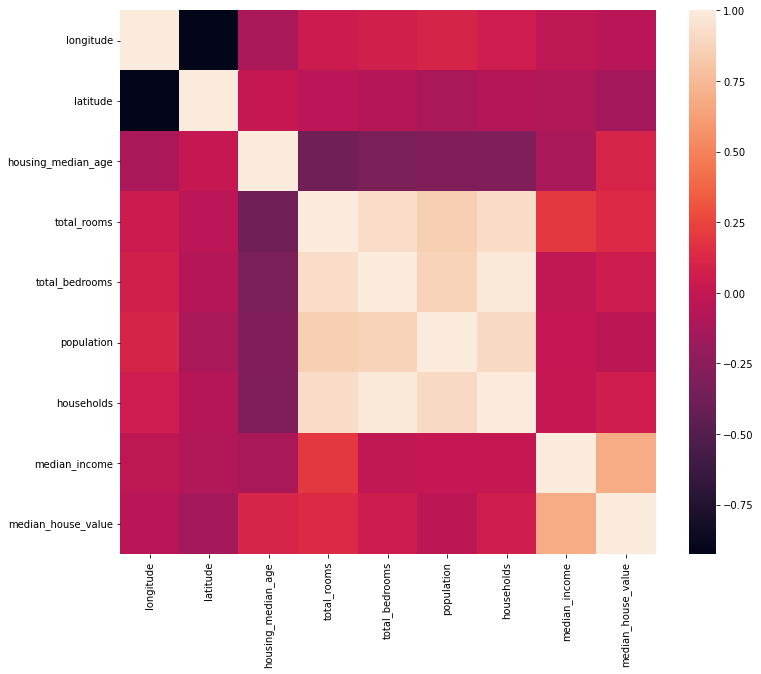

In [25]:
# A heatmap is used to graphically represent the values in a matrix or a dataframe.
# Let us plot the heatmap of df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(df.corr())
plt.show()

But this heatmap just shows colors, so we use __annot__ parameter

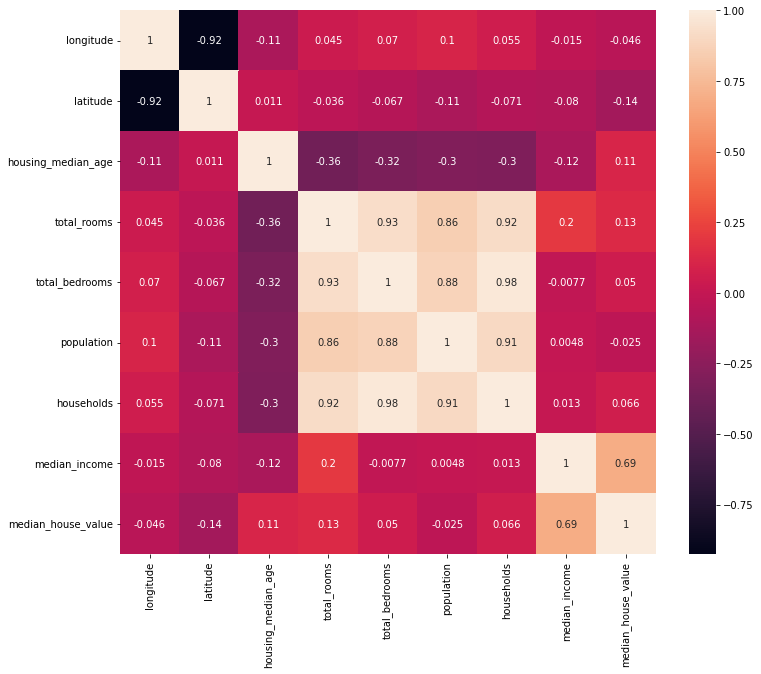

In [26]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

We can also give spaces between each cell using __lw__ parameter.

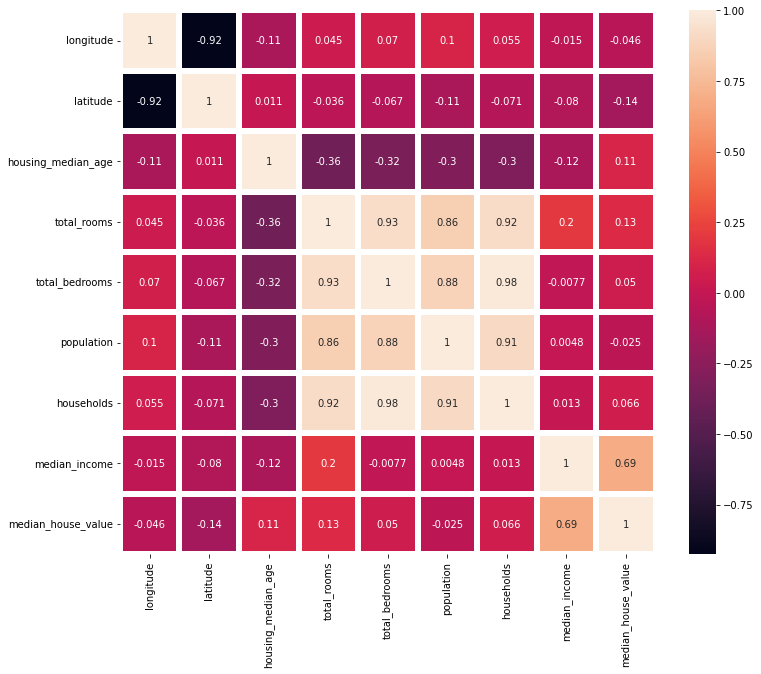

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot = True,lw=5)
plt.show()

We can also give colors acc to our own by using __cmap__ parameter.

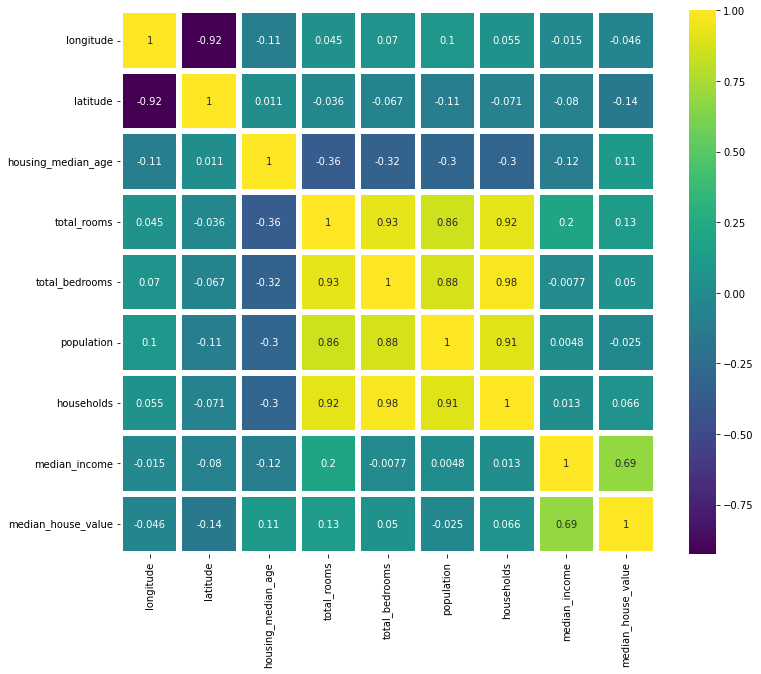

In [28]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot = True,lw=5,cmap='viridis')
plt.show()

# __4. Data Preprocessing__

- __Feature Engineering__<br>
  Feature engineering or feature extraction is the process of using domain knowledge to extract features from raw data. The motivation is to use these extra features to improve the quality of results from a machine learning process, compared with supplying only the raw data to the machine learning process.

In [29]:
# Now let us introduce some new features in our data
df["rooms_per_house"] = df["total_rooms"]/df["households"]


In [30]:
# now let us see the correlation of newly added feature with the 'median_house_value'.
df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

This newly added feature has the second highest correlation with my 'median_house_value'. So if now someone asks me to select two features for training my model then i would select __median_income__ and __rooms_per_house__.

In [31]:
# Now let us another feature in our dataset.
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]


In [32]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_per_room
12024,-117.46,33.94,26,2481.0,620.0,2411.0,552.0,1.7059,85800.0,INLAND,4.494565,0.249899
7416,-118.22,33.94,42,1115.0,297.0,1412.0,325.0,3.0903,153500.0,<1H OCEAN,3.430769,0.266368
11459,-117.99,33.68,18,2024.0,462.0,1047.0,451.0,3.5848,186900.0,<1H OCEAN,4.487805,0.228261
12110,-117.35,34.01,23,3707.0,769.0,1938.0,658.0,2.7250,95300.0,INLAND,5.633739,0.207445
2974,-119.10,35.33,4,6640.0,898.0,3121.0,902.0,6.7590,170300.0,INLAND,7.361419,0.135241


Now let us see the correlation of this newly added feature with the __median_house_value__

In [33]:
df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_per_room    -0.255880
Name: median_house_value, dtype: float64

Take a look at above values. Now if anyone tells me to select only two features to train my model then i would select __median_income__ and __bedrooms_per_room__.

# __5. Data Cleaning__

  __Handling Null value__

In [34]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
rooms_per_house         0
bedrooms_per_room     207
dtype: int64

We have null values in __total_bedrooms__ and __bedrooms_per_room__

In [35]:
# we will fill 'total_bedrooms' with the median value, this is mean/median imputation.
df["total_bedrooms"].median()

435.0

In [36]:
df["total_rooms"].min()

2.0

In [37]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

In [38]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms          0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
rooms_per_house         0
bedrooms_per_room     207
dtype: int64

But we are still seeing null values in __bedrooms_per_room__, so we will update it.

In [39]:
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]


In [40]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
rooms_per_house       0
bedrooms_per_room     0
dtype: int64

Handling null values using predefined functions.

In [41]:
# sklearn's predefine function to handle null values
# SimpleImputer is a scikit-learn class which is helpful in handling the missing data. 
# It replaces the NaN values with a specified placeholder.

from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = "median") # create an object of type SimpleImputer

si.fit(df[["total_bedrooms"]]) # first learn from the data -> calculate the median value
si.transform(df[["total_bedrooms"]]) # fill the calculated median value in missing data

array([[ 129.],
       [1106.],
       [ 190.],
       ...,
       [ 485.],
       [ 409.],
       [ 616.]])

In [42]:
# or we can use fit_transform method 
si.fit_transform(df[["total_bedrooms"]])


array([[ 129.],
       [1106.],
       [ 190.],
       ...,
       [ 485.],
       [ 409.],
       [ 616.]])

# __handling categorical data__

In [43]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_per_room
4681,-118.34,34.08,52,2756.0,542.0,971.0,510.0,5.5871,500001.0,<1H OCEAN,5.403922,0.196662
9146,-118.50,34.45,25,1290.0,190.0,689.0,216.0,6.0097,220200.0,<1H OCEAN,5.972222,0.147287
5173,-118.27,33.95,40,935.0,226.0,818.0,236.0,1.8798,101300.0,<1H OCEAN,3.961864,0.241711
11201,-117.92,33.83,17,382.0,86.0,272.0,81.0,1.4250,212500.0,<1H OCEAN,4.716049,0.225131
1896,-120.02,38.92,24,1194.0,246.0,414.0,151.0,3.2396,101900.0,INLAND,7.907285,0.206030


Here we have a categorical column __ocean_proximity__.

In [44]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Machine learning models require all input and output variables to be numeric.

This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model.

The two most popular techniques are an __Ordinal Encoding__ and a __One-Hot Encoding__.

__Ordinal encoding__ is used when data can be arranged according to some order, and __One Hot Encoding__ is used when data can not be arranged in some specific order.

Here __ocean_proximity__ can be arranged acc to __median_house_value__ so we use Ordinal Encoding in this case.


In [45]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
oe.fit(df[["ocean_proximity"]])  # learn
oe.transform(df[["ocean_proximity"]])

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [46]:
# for OneHotEncoding we can use get_dummies method of pandas
pd.get_dummies(df["ocean_proximity"])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


We can also do One Hot Encoding using scikit learn OneHotEncoder.

In [47]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder() # creating an object of OneHotEncoder type
ohe.fit(df[["ocean_proximity"]]) #learns the data
ohe.transform(df[["ocean_proximity"]]) # applies OneHotEncoding

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

We see that the output of __OneHotEncoding__ is in the form of sparse matrix, So we will convert it into numpy array using __toarray()__ method.

In [48]:
ohe.transform(df[["ocean_proximity"]]).toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

# __Scaling__

- __Normalization__
  Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

   Here’s the formula for normalization:<br>
   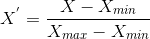


In [49]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

Since __Normalization__ can be done only numerical columns of a dataframe, We will seperate numerical columns into a seperate dataframe.

In [50]:
numerical_data = df.drop("ocean_proximity", axis = 1)
numerical_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_per_room
0,-122.23,37.88,41,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591
1,-122.22,37.86,21,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797
2,-122.24,37.85,52,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516
3,-122.25,37.85,52,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458
4,-122.25,37.85,52,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096


In [51]:
mms.fit(numerical_data)
transformed_data = mms.transform(numerical_data)

In [52]:
transformed_data

array([[0.21115538, 0.5674814 , 0.78431373, ..., 0.90226638, 0.0435123 ,
        0.03926064],
       [0.21215139, 0.565356  , 0.39215686, ..., 0.70824656, 0.03822395,
        0.0425631 ],
       [0.21015936, 0.5642933 , 1.        , ..., 0.69505074, 0.05275646,
        0.03313518],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.15938285, 0.03090386,
        0.06386388],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.14371281, 0.03178269,
        0.06555694],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.15340349, 0.03125246,
        0.06602059]])

In [53]:
transformed_data.min()
# This shows that Normalization changes the minimum value to 0


0.0

In [54]:
transformed_data.max()
# This shows that Normalization changes the maximum value to 1.


1.0

- # __Standardization__
  Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

  Here’s the formula for standardization:<br>
  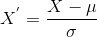


In [55]:
# Standardization
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(numerical_data)  
scaled_data = ss.transform(numerical_data)

In [56]:
scaled_data.mean()
# Mean has become approximately 0.

-8.552551040720586e-16

In [57]:
scaled_data.var()
# var has become approximately 1.

1.0000000000000002

# __6. Transformation__

In [58]:
from sklearn.compose import ColumnTransformer

In [59]:
cat_col = ["ocean_proximity"]
num_col = list(df.drop(["ocean_proximity", "median_house_value"], axis = 1).columns)

col_trans = ColumnTransformer(
    [
     ("onehotenco", OneHotEncoder(), cat_col),
     ("Imputer", SimpleImputer(strategy="median"), num_col),
     ("scaling", StandardScaler(), num_col)
    ]
)

In [60]:
Y = df["median_house_value"]
X = df.drop("median_house_value", axis = 1)

In [61]:
col_trans.fit(X)


ColumnTransformer(transformers=[('onehotenco', OneHotEncoder(),
                                 ['ocean_proximity']),
                                ('Imputer', SimpleImputer(strategy='median'),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income',
                                  'rooms_per_house', 'bedrooms_per_room']),
                                ('scaling', StandardScaler(),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income',
                                  'rooms_per_house', 'bedrooms_per_room'])])

In [62]:
X = col_trans.transform(X)
X.shape

(20640, 25)

observe that ColumnTransformer has generated 25 columns(why?). Because __num_col__ has 10  columns and column transformer applies each step freshly.
So it will generate 5 columns from __OneHotEncoding__ and 8 from __SimpleImputer__ and again 8 from __StandardScalar__.

# __7. Select & Train Model__

In [63]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, Y)
# Note that here we are passing Y which is a pandas series.

LinearRegression()

In [64]:
y_pred = lr.predict(X)

In [65]:
y_pred
# These are the values predicted by our LinearRegression model.

array([406327.53515625, 431388.55859375, 377393.52734375, ...,
        37066.8828125 ,  48298.765625  ,  64283.40625   ])

In [66]:
len(y_pred)

20640

In [67]:
# Let us see the original value and then compare it with y_pred
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

Observe that our model is not even able to predict the values which we gave it to learn. So how we may expect it to work for newer values.

Let us use another model Decision tree.

In [68]:
from sklearn.tree import DecisionTreeRegressor
tree  = DecisionTreeRegressor() # create an object of type DecisionTreeRegressor()

tree.fit(X,Y) # now the model will learn from the data

DecisionTreeRegressor()

In [69]:
tree_pred = tree.predict(X)

In [70]:
# Now let us see the values predicted by Decision Tree and original values.
print(tree_pred)
print(np.array(Y.values))

[452600. 358500. 352100. ...  92300.  84700.  89400.]
[452600. 358500. 352100. ...  92300.  84700.  89400.]


 We can see that DecisionTree is atleast working for the data we trained it from.

# __Now let us see the error in both the models__

In [71]:
from sklearn.metrics import mean_squared_error

print("Error for LinearRegression: ", mean_squared_error(Y, y_pred))
print("Error for DecisionTree: ", mean_squared_error(Y, tree_pred))

Error for LinearRegression:  4663695959.655054
Error for DecisionTree:  0.0


- From this above cell it might seem that DecisionTree is a better model in comparison to LinearRegression.

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state = 42)

# Train size = 0.7 means that 70% of the data will be used for training the model and the rest would be reserved for testing.

In [73]:
print(X.shape[0])
print(X_train.shape[0])
print(X_test.shape[0])


20640
14447
6193


In [74]:
14447/20640
# This is approximately 70%.

0.6999515503875969

In [75]:
X.reshape(-1,1)

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       ...,
       [-0.78012947],
       [-0.07044252],
       [ 0.11327519]])

In [76]:
# Now let us see X_train
X_train.reshape(-1,1)

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       ...,
       [-0.68174943],
       [-0.81905034],
       [ 1.49241301]])

In [77]:
X_test.reshape(-1,1)

array([[ 0.        ],
       [ 1.        ],
       [ 0.        ],
       ...,
       [ 0.13713671],
       [ 0.18323866],
       [-0.73506935]])

From the above three cells, it is clear that __test_train_split__ shuffles the data and then takes 70% of the data for training.

# Lets train the model from training data and then test using testing data.

In [78]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [79]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [80]:
print("Error for LinearRegression: ", mean_squared_error(y_test, lr_pred))
print("Error for DecisionTree: ", mean_squared_error(y_test, dt_pred))

Error for LinearRegression:  4962459650.779567
Error for DecisionTree:  5035221574.7845955


### Now we can see that LinearRegression is a better model in this case.

Let us use another model __RandomForestRegressor__

In [81]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

In [82]:
print("Error for RandomForest: ", mean_squared_error(y_test, forest_pred))
print("Error for LinearRegression: ", mean_squared_error(y_test, lr_pred))
print("Error for DecisionTree: ", mean_squared_error(y_test, dt_pred))

Error for RandomForest:  2480037175.0592837
Error for LinearRegression:  4962459650.779567
Error for DecisionTree:  5035221574.7845955


From here we can clearly see that RandomForest is the best model for this dataset as it is producing the least error.

# __Save Model__

In [83]:
# The pickle module can transform a complex object into a byte stream and 
# it can transform the byte stream into an object with the same internal structure

import pickle

In [84]:
# Save Model
pickle.dump(forest,open("forest_model",'wb'))

# 'wb' means that open the file in 'write binary' mode

In [85]:
# Load saved model
load_model = pickle.load(open("forest_model","rb"))

# this will load the model in "rb"(read binary) mode

In [86]:
# Now let us predict the data using the loaded model
load_model.predict(X_test)

array([ 52807.  , 108139.01, 461234.4 , ..., 153162.  , 219223.  ,
       199575.  ])

In [87]:
y_pred = load_model.predict(X_test)

print(y_pred) # This is the predicted value
print(np.array(y_test.values)) # This is the original value

[ 52807.   108139.01 461234.4  ... 153162.   219223.   199575.  ]
[ 47700.  45800. 500001. ... 119400. 209800. 193800.]


In [88]:
# Let us calculate the error our model has produced

print("The error is ",  mean_squared_error(y_pred,y_test))

The error is  2480037175.0592837


# Let us change some parameters in our model.

In [89]:
forest = RandomForestRegressor(n_estimators=50)
forest.fit(X_train,y_train)
forest_pred = forest.predict(X_test)

In [92]:
# Now let us print the values predicted by our model and also the original values
print(forest_pred)
print(y_test.values)

[ 54668.  110758.  462786.4 ... 145994.  231574.  201154. ]
[ 47700.  45800. 500001. ... 119400. 209800. 193800.]


In [93]:
# Now let us calculate the error in this tuned model
print("Error for RandomForestRegressor : ",mean_squared_error(forest_pred,y_pred))

Error for RandomForestRegressor :  91921054.51175551


This is a very small error in comparison to our last model.

# <font color= 'green'>GridSearchCv(15th April starting)</font>

In [94]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor() # create an object of type RandomForestRegressor

params = [
          {'n_estimators':[2,3,4],"max_depth":[2,3]}
]
# params means the list of parameters you want to play with in your model
# so GridSearchCv will try for all the combination of parameters in param.
gscv = GridSearchCV(forest,params,scoring="mean_squared_error",cv = 3,n_jobs = -1)

# In gridsearchCv we need to pass the model and then the parameters you want to play with.

## scoring tells that on what basis we want to say which model is best, so here we have given scoring as "mean_squared_error"
## so it will select the model for the parameters when it has least mean_squared_error


## CV means "cross_validation"---->


## n_jobs means how may cores of our processor we want GridSearchCv to use, if you dont know how may cores your cpu have
## then give it -1.


In [95]:
# Now let us fit the data, but here we will not give X_train and y_train because we have given cv = 3 , so we will give full data
gscv.fit(X,Y)

ValueError: ignored

In [97]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [98]:
gscv = GridSearchCV(forest,params,scoring="neg_mean_squared_error",cv = 3,n_jobs = -1)


In [99]:
gscv.fit(X,Y)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_depth': [2, 3], 'n_estimators': [2, 3, 4]}],
             scoring='neg_mean_squared_error')

In [100]:
# to see the results 
gscv.cv_results_

{'mean_fit_time': array([0.23899579, 0.27527674, 0.35250314, 0.24938687, 0.36148699,
        0.47977169]),
 'mean_score_time': array([0.00744112, 0.00387224, 0.00700283, 0.00562771, 0.00639566,
        0.00628718]),
 'mean_test_score': array([-6.78061601e+09, -6.81466460e+09, -6.68827543e+09, -6.22902759e+09,
        -6.12409538e+09, -6.06740874e+09]),
 'param_max_depth': masked_array(data=[2, 2, 2, 3, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[2, 3, 4, 2, 3, 4],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2, 'n_estimators': 2},
  {'max_depth': 2, 'n_estimators': 3},
  {'max_depth': 2, 'n_estimators': 4},
  {'max_depth': 3, 'n_estimators': 2},
  {'max_depth': 3, 'n_estimators': 3},
  {'max_depth': 3, 'n_estimators': 4}],
 'rank_test_score': array([5, 6, 4, 3, 2, 1], dtype

In [102]:
# let us access the parameters
gscv.cv_results_['params']

[{'max_depth': 2, 'n_estimators': 2},
 {'max_depth': 2, 'n_estimators': 3},
 {'max_depth': 2, 'n_estimators': 4},
 {'max_depth': 3, 'n_estimators': 2},
 {'max_depth': 3, 'n_estimators': 3},
 {'max_depth': 3, 'n_estimators': 4}]

In [103]:
gscv.cv_results_['mean_test_score']

array([-6.78061601e+09, -6.81466460e+09, -6.68827543e+09, -6.22902759e+09,
       -6.12409538e+09, -6.06740874e+09])

In [104]:
param = gscv.cv_results_['params']
score = gscv.cv_results_['mean_test_score']

In [105]:
for res in zip(param,score):
  print(res[0],-res[1])

{'max_depth': 2, 'n_estimators': 2} 6780616008.025856
{'max_depth': 2, 'n_estimators': 3} 6814664598.865131
{'max_depth': 2, 'n_estimators': 4} 6688275425.41695
{'max_depth': 3, 'n_estimators': 2} 6229027593.733747
{'max_depth': 3, 'n_estimators': 3} 6124095375.95099
{'max_depth': 3, 'n_estimators': 4} 6067408744.196324


This showsw the best model is achieved at __{'max_depth': 3, 'n_estimators': 4}__

# <font color = 'purple'>RandomizedCv</font>

In [115]:
from sklearn.model_selection import RandomizedSearchCV


params = [
          {'n_estimators':[2,3,4],"max_depth":[2,3]}
]




rscv = RandomizedSearchCV(forest,params,scoring="neg_mean_squared_error",cv = 3,n_jobs = -1)

In [116]:
rscv.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning:

The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.



RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions=[{'max_depth': [2, 3],
                                         'n_estimators': [2, 3, 4]}],
                   scoring='neg_mean_squared_error')

In [117]:
param = rscv.cv_results_['params']
score = rscv.cv_results_['mean_test_score']


for res in zip(param,score):
  print(res[0],-res[1])

{'n_estimators': 2, 'max_depth': 2} 6832433200.376324
{'n_estimators': 3, 'max_depth': 2} 6746936987.148801
{'n_estimators': 4, 'max_depth': 2} 6653588219.855861
{'n_estimators': 2, 'max_depth': 3} 6034233018.169315
{'n_estimators': 3, 'max_depth': 3} 6085716063.67775
{'n_estimators': 4, 'max_depth': 3} 6153213513.629631


We can see that we have got the least mean_squared_error in case when __{'n_estimators': 2, 'max_depth': 3}__